In [2]:
from skimage import exposure
import skimage as sk
import matplotlib.pyplot as plt
import numpy as np

In [3]:
image = sk.io.imread(r"C:\\Users\Thenzing\Downloads\19214_B2_Mouse2_Veh_P36_M_C57_Rln_PFC4_FIG11_L.tif")

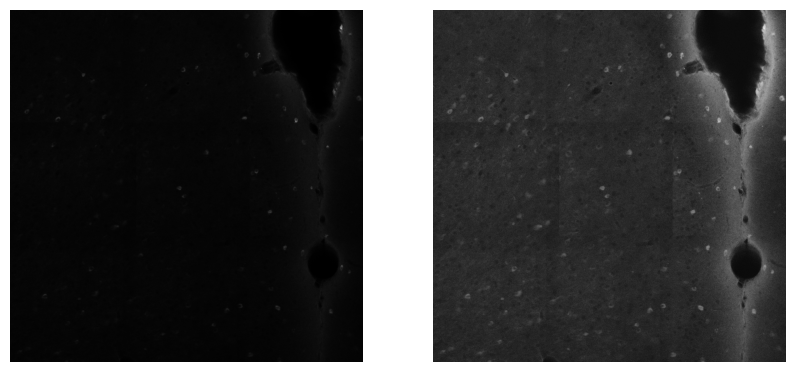

In [4]:
slice_image = image[0]
fig, ax = plt.subplots(1, 2, figsize = (10,10))
img_adapteq = exposure.equalize_adapthist(slice_image, clip_limit=0.05)
ax[1].imshow(img_adapteq, cmap='gray')
ax[0].imshow(slice_image, cmap='gray')
ax[0].set_axis_off()
ax[1].set_axis_off()

In [25]:
from skimage import img_as_float

def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf

(<Axes: >, <Axes: xlabel='Pixel intensity'>, <Axes: >)

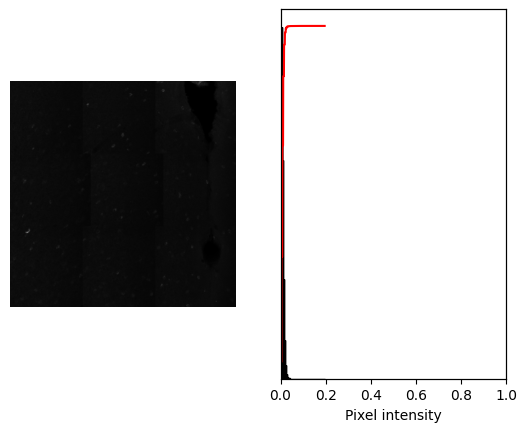

In [26]:
fig, ax = plt.subplots(1,2)
plot_img_and_hist(slice_image, ax)

(<Axes: >, <Axes: xlabel='Pixel intensity'>, <Axes: >)

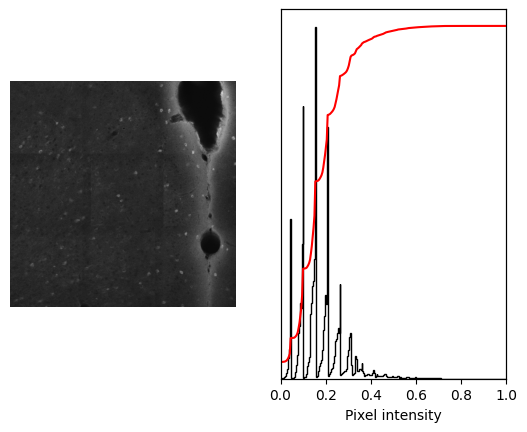

In [34]:
fig, ax = plt.subplots(1,2)
plot_img_and_hist(img_adapteq, ax)

In [44]:
slice_image

array([[1, 2, 2, ..., 3, 1, 1],
       [2, 5, 3, ..., 2, 3, 2],
       [1, 3, 3, ..., 5, 5, 2],
       ...,
       [0, 4, 1, ..., 2, 3, 0],
       [1, 4, 3, ..., 1, 1, 1],
       [0, 1, 2, ..., 2, 0, 2]], dtype=uint8)

In [41]:
img_adapteq

array([[0.2697201 , 0.10782443, 0.30699746, ..., 0.11520356, 0.06170483,
        0.11520356],
       [0.16176845, 0.16176845, 0.3471374 , ..., 0.06170483, 0.06164122,
        0.00839695],
       [0.05381679, 0.10782443, 0.16176845, ..., 0.1687659 , 0.1687659 ,
        0.1687659 ],
       ...,
       [0.11157761, 0.05756997, 0.11157761, ..., 0.06259542, 0.06259542,
        0.06259542],
       [0.16552163, 0.05756997, 0.16552163, ..., 0.06259542, 0.11698473,
        0.06259542],
       [0.11157761, 0.11157761, 0.11157761, ..., 0.11698473, 0.06259542,
        0.06259542]])

In [45]:
scaled_slice = (img_adapteq * 255).astype(np.uint8)

In [46]:
scaled_slice

array([[25, 39, 39, ..., 51, 24, 24],
       [39, 78, 53, ..., 38, 51, 38],
       [25, 53, 53, ..., 78, 78, 38],
       ...,
       [11, 67, 25, ..., 39, 53, 11],
       [25, 67, 53, ..., 24, 24, 24],
       [11, 25, 39, ..., 39, 11, 39]], dtype=uint8)

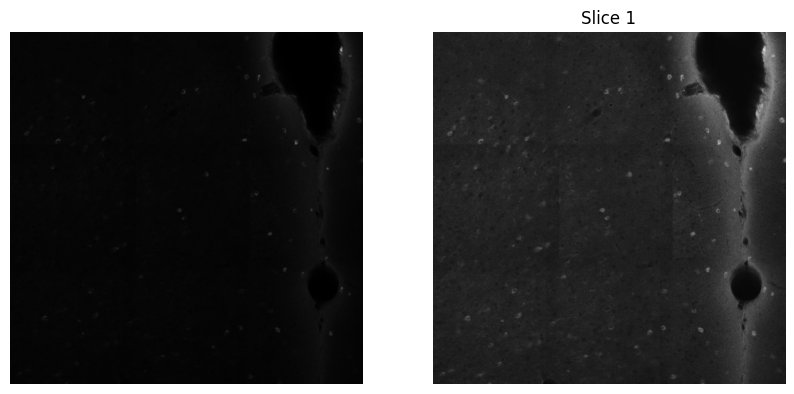

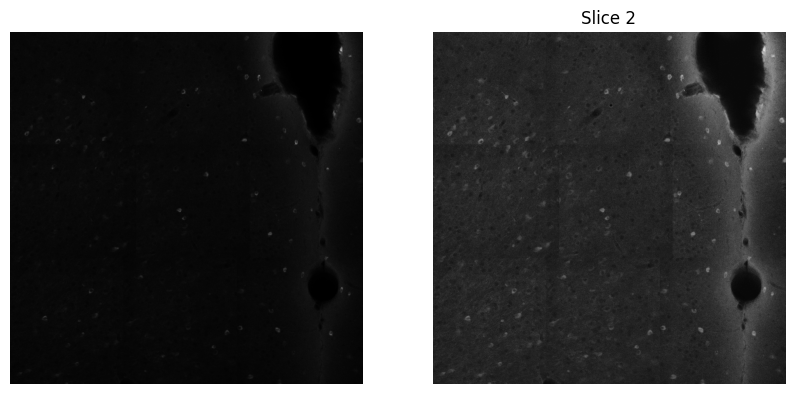

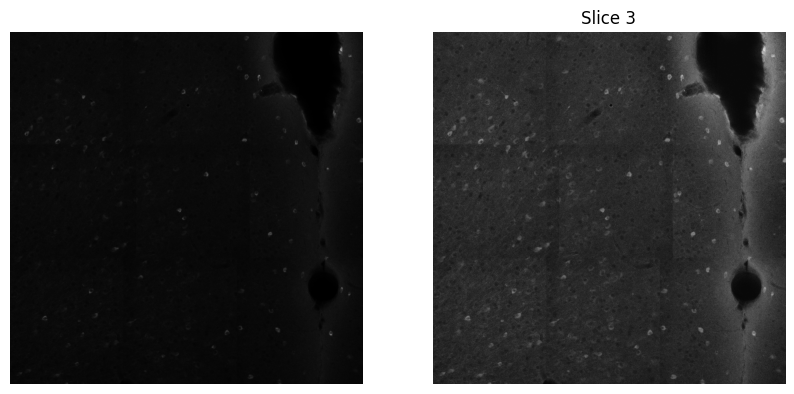

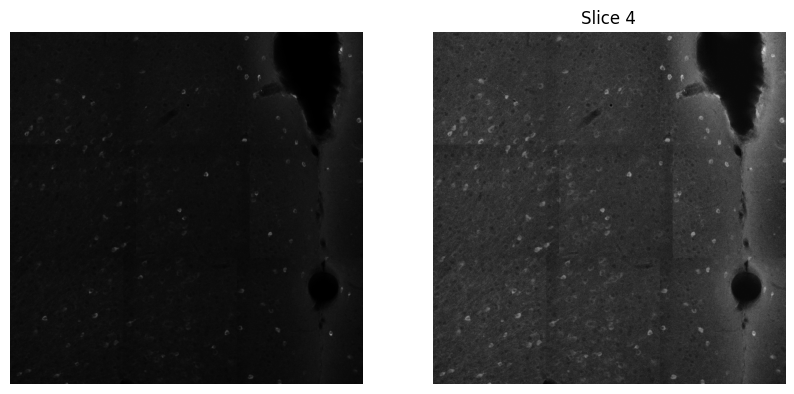

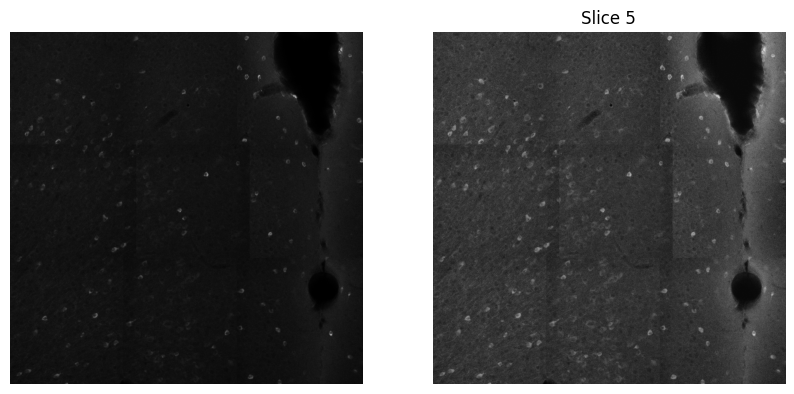

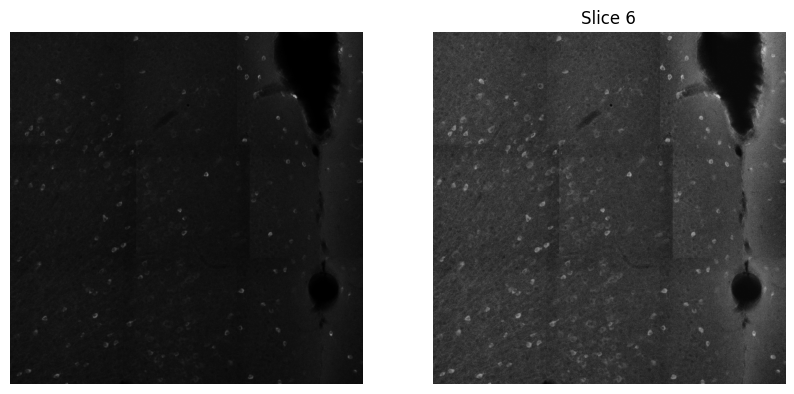

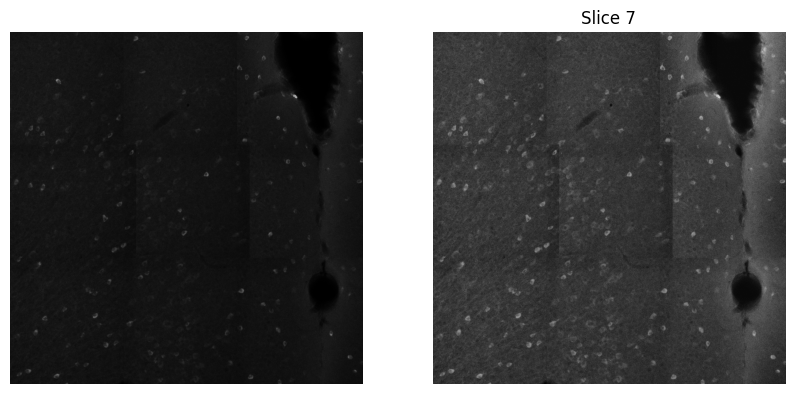

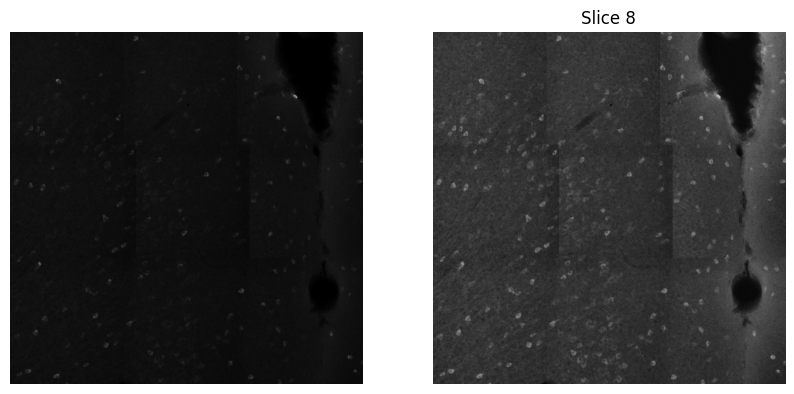

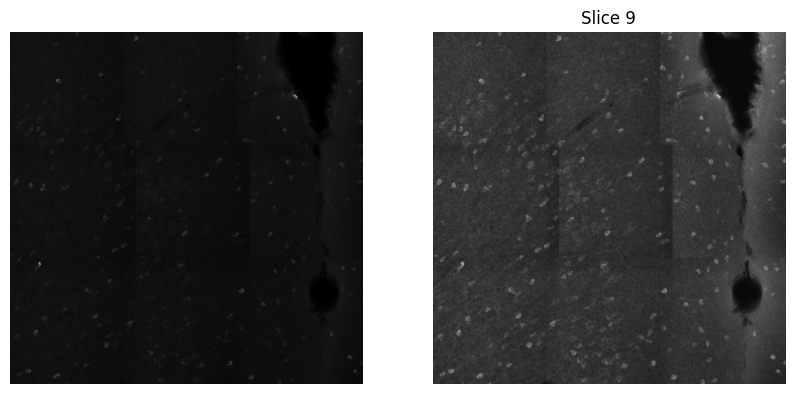

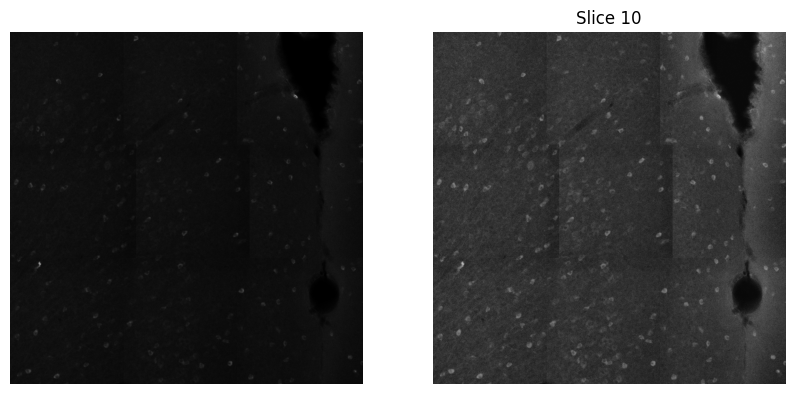

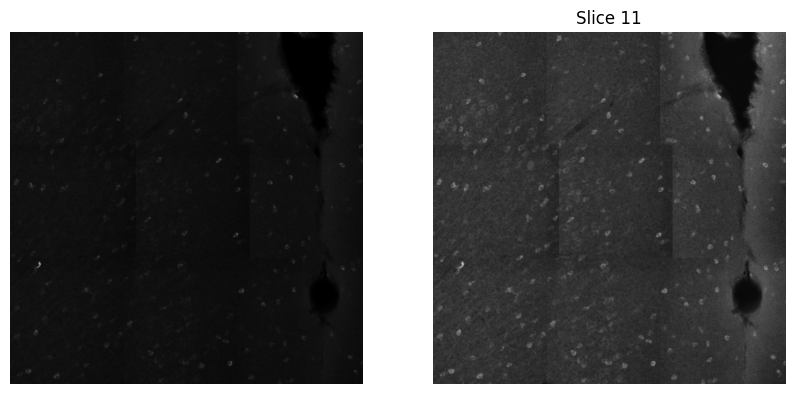

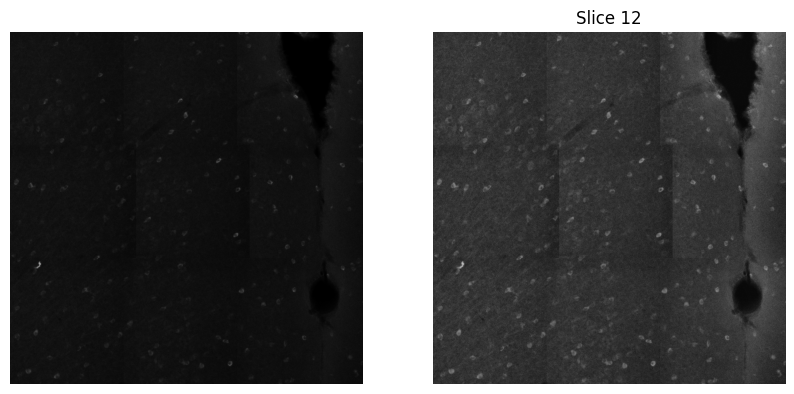

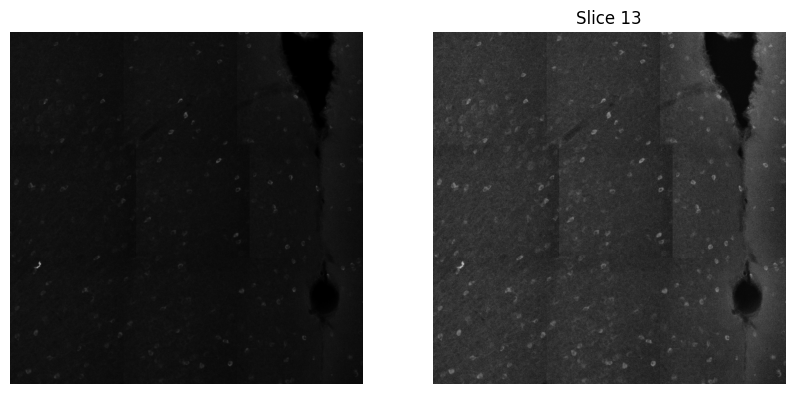

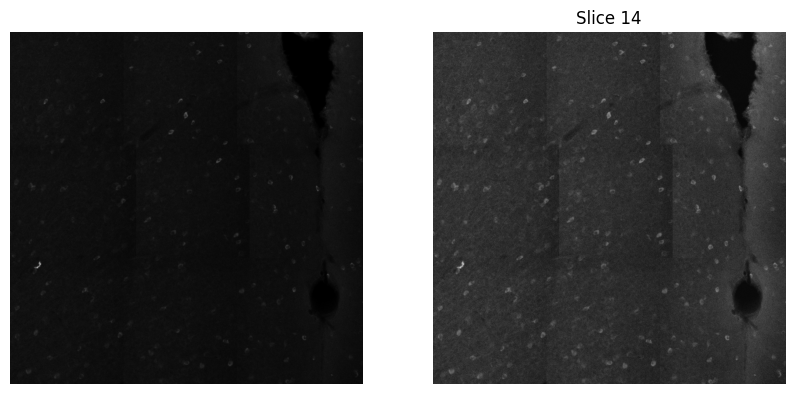

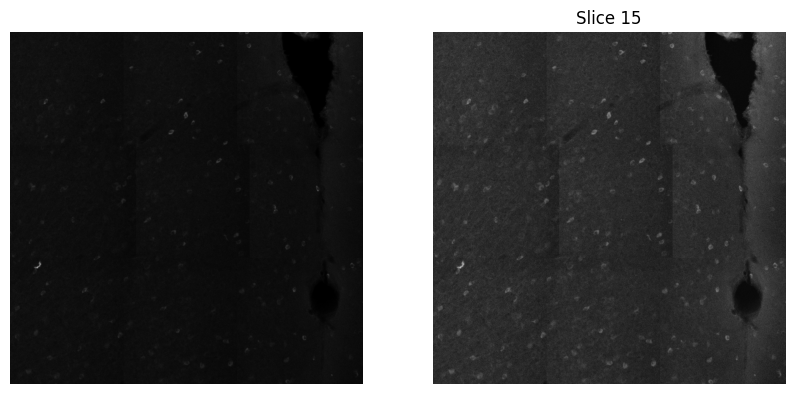

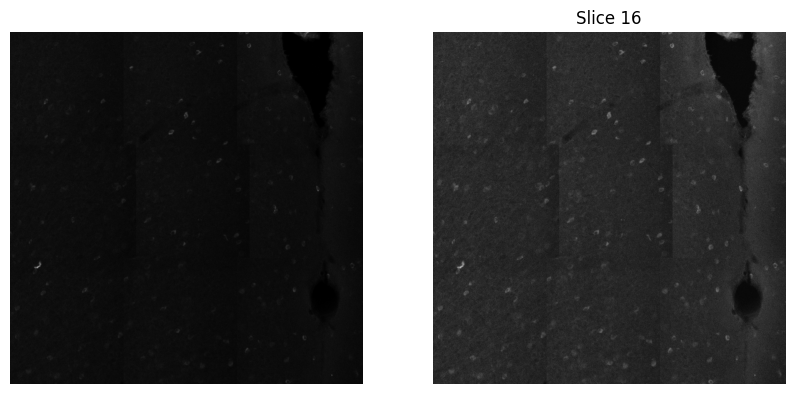

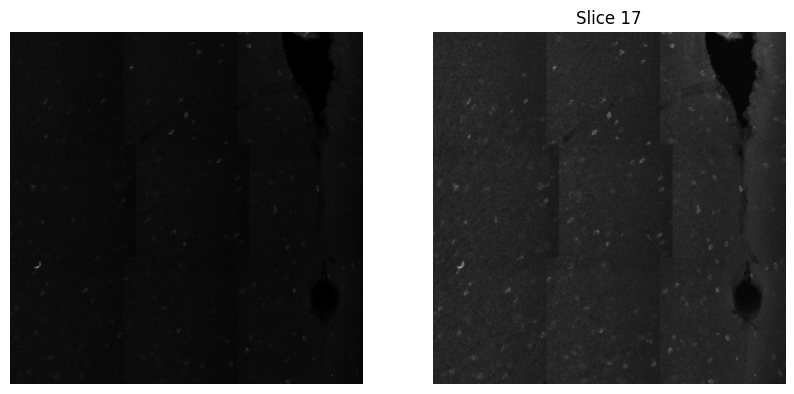

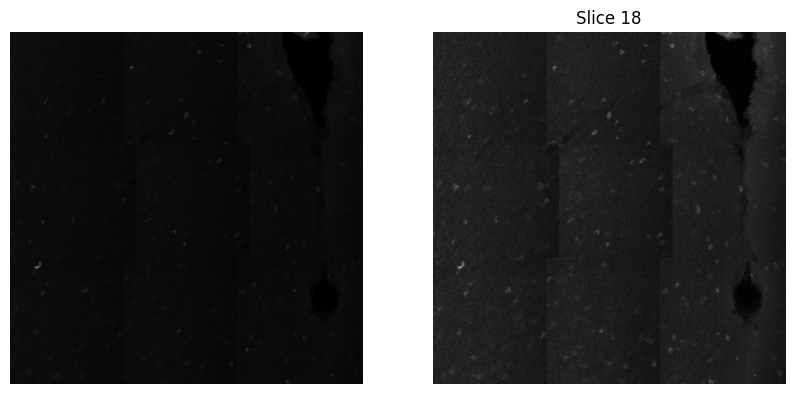

In [47]:

reconstructed_stack = np.zeros_like(image)
for index in range(image.shape[0]):
    # Access each slice
    slice_image = image[index]

    fig, ax = plt.subplots(1, 2, figsize = (10,10))
    img_adapteq = exposure.equalize_adapthist(slice_image, clip_limit=0.04)
    scaled_slice = (img_adapteq * 255).astype(np.uint8)
    reconstructed_stack[index] = scaled_slice
    ax[1].imshow(scaled_slice, cmap='gray')
    ax[0].imshow(slice_image, cmap='gray')
    ax[0].set_axis_off()
    ax[1].set_axis_off()
    
    plt.title(f"Slice {index + 1}")
    plt.show()

In [48]:
reconstructed_stack

array([[[ 19,  31,  31, ...,  41,  19,  19],
        [ 31,  66,  43, ...,  30,  41,  30],
        [ 19,  43,  43, ...,  63,  63,  30],
        ...,
        [  8,  54,  19, ...,  31,  43,   8],
        [ 19,  54,  43, ...,  19,  19,  19],
        [  8,  19,  31, ...,  31,   8,  31]],

       [[ 15,  38,  50, ...,  30,  74,  52],
        [ 15,  15,  74, ...,  19,  52,  30],
        [ 38,  50,  50, ...,  41,  41,  30],
        ...,
        [ 43,  20,  31, ...,  16,  28,  16],
        [ 20,  31,  20, ...,   5,  28,  16],
        [ 20,  67,  79, ...,  39,  28,   5]],

       [[ 12,  35,  23, ...,  59,  80,  39],
        [ 23,  70,  47, ...,  48,  39,  39],
        [ 23,  47,  35, ...,  48,  69,  31],
        ...,
        [ 14,  38,  49, ...,  25,  91,  48],
        [ 49,  38,  38, ...,  36,  13,  13],
        [ 61,  61,  49, ...,  25,  36,  13]],

       ...,

       [[ 38,  64,  25, ...,  71,  71,  20],
        [ 25,  50,  95, ...,  58,  32,  58],
        [ 12,  50,  12, ...,  45, 112,  58

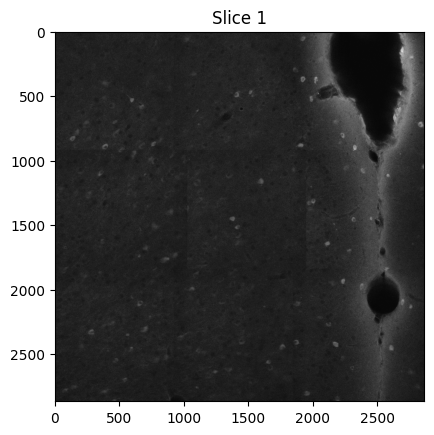

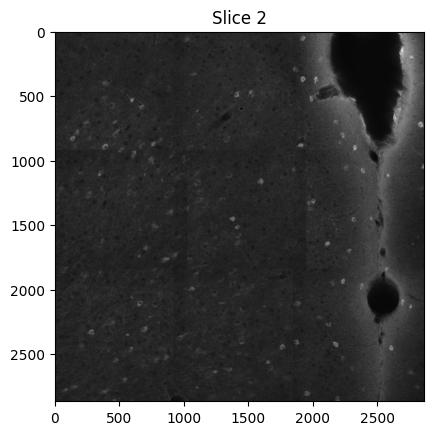

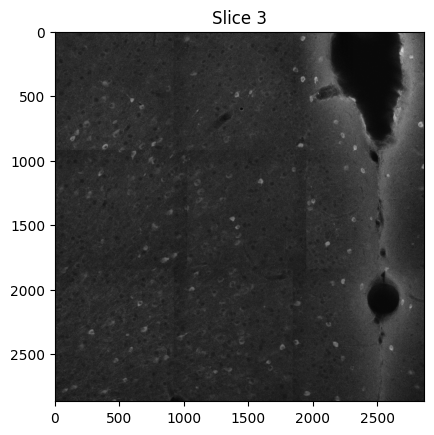

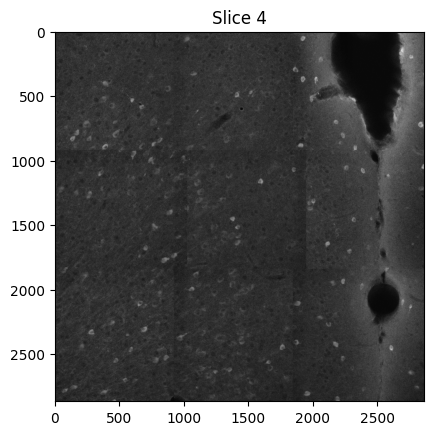

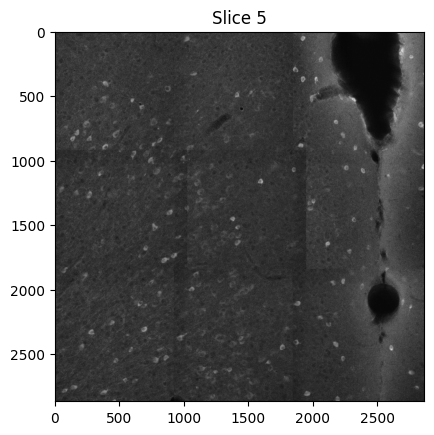

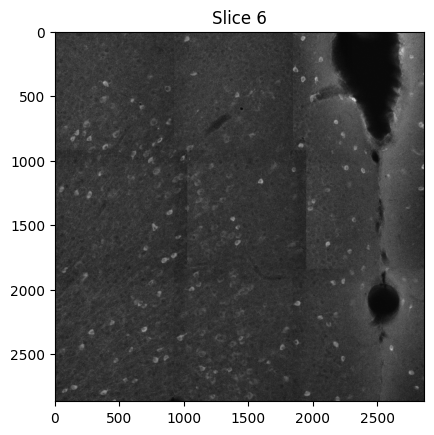

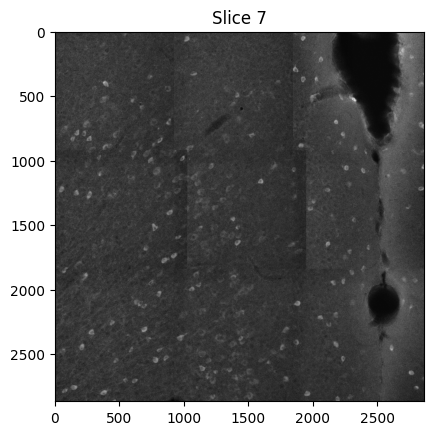

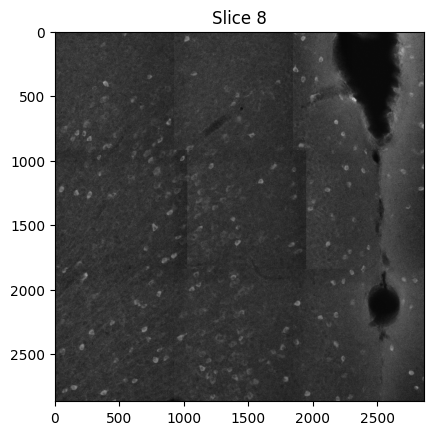

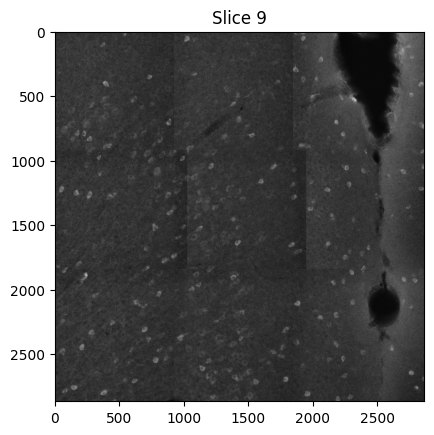

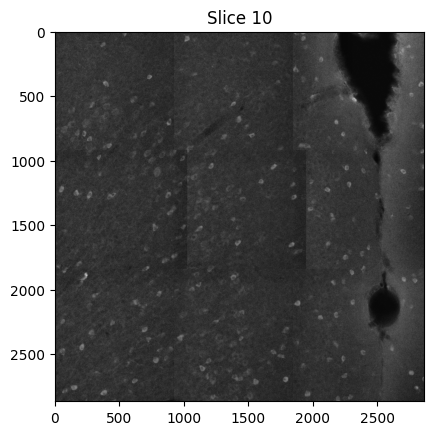

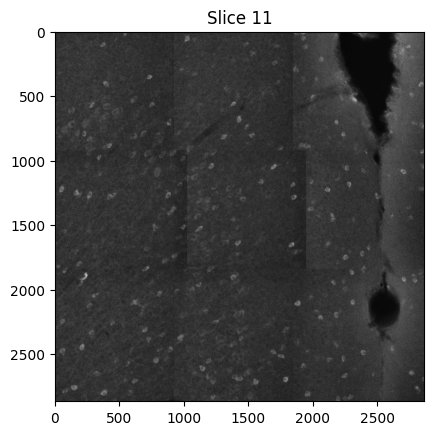

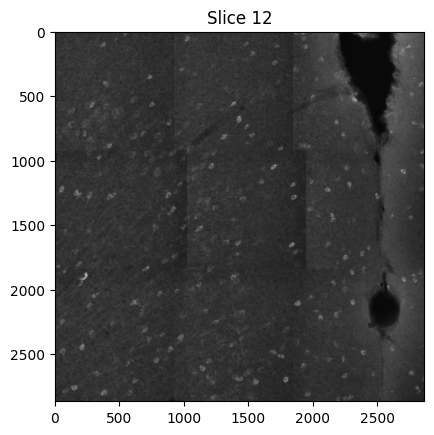

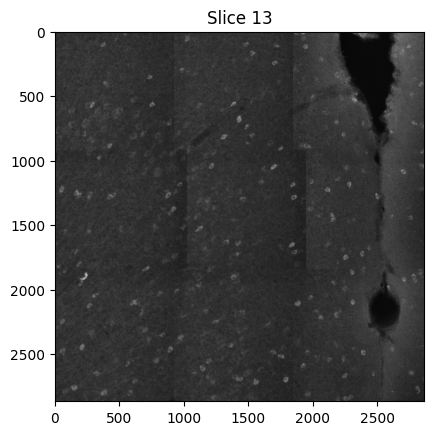

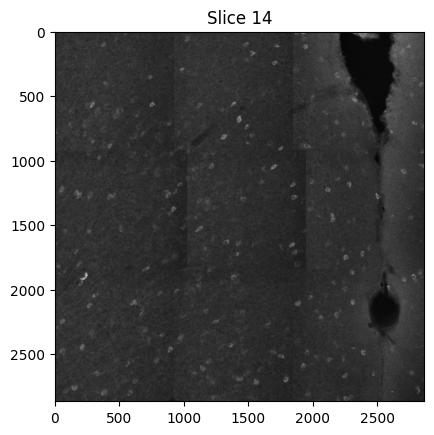

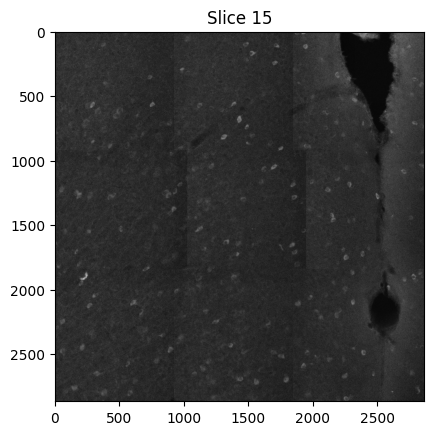

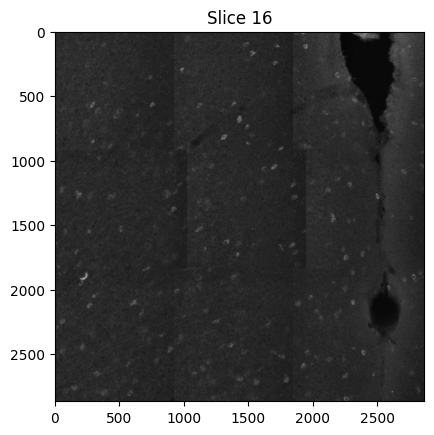

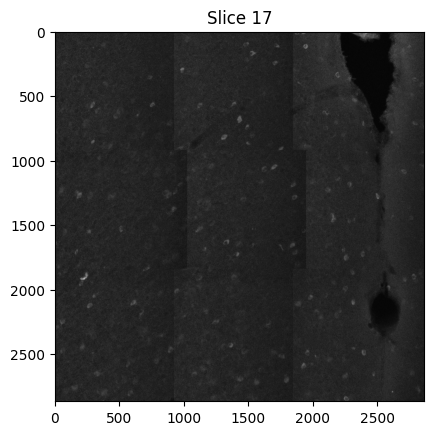

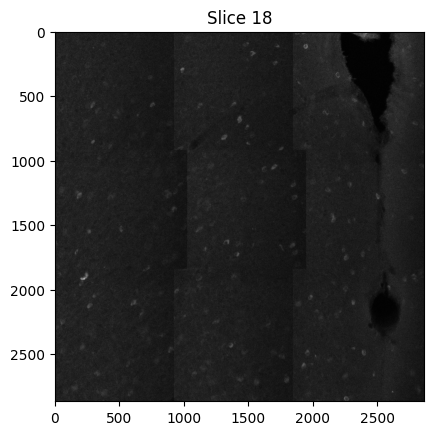

In [49]:

# Iterate through each slice in the stack
for index in range(reconstructed_stack.shape[0]):
    # Access each slice
    slice_image = reconstructed_stack[index]
    
    # Do something with the slice, for example, display it
    plt.imshow(slice_image, cmap='gray')
    plt.title(f"Slice {index + 1}")
    plt.show()

In [7]:
import imageio

In [51]:
imageio.volwrite(r'C:\\Users\Thenzing\Downloads\reconstructed_stack.tif', reconstructed_stack, format='tiff')

In [1]:
import cv2

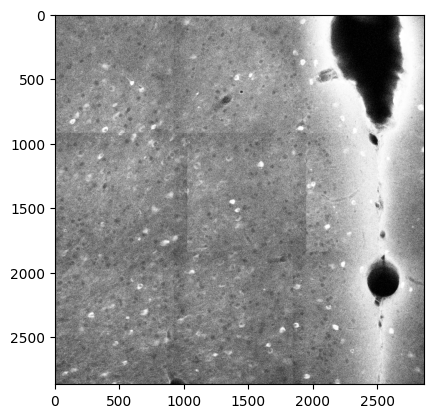

In [11]:
slice_image = image[0]
cvequalhist = cv2.equalizeHist(slice_image)
plt.imshow(cvequalhist, cmap='gray')

In [10]:
plt.imsave(r'C:\\Users\Thenzing\Downloads\cvhistequal.png', cvequalhist)